In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
import matplotlib.pyplot as plt
plt.style.use(style="ggplot")
plt.rcParams['figure.figsize'] = [10,6]

In [7]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

skew is :  1.88287575977


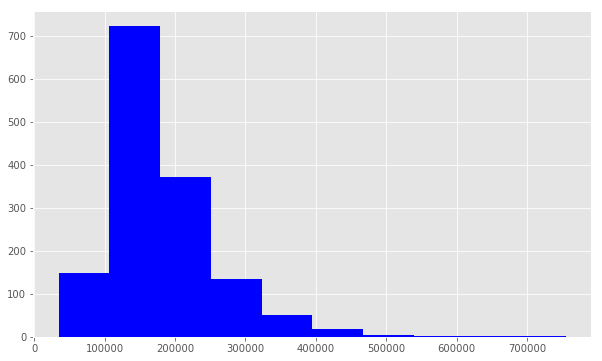

In [8]:
print("skew is : ", train.SalePrice.skew())
plt.hist(train.SalePrice, color = "blue")
plt.show()

ske is :  0.121335062205


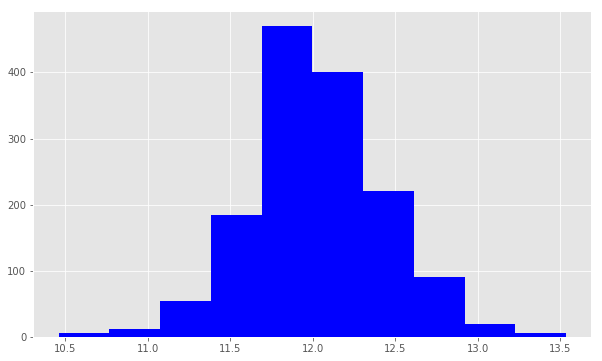

In [9]:
target = np.log(train.SalePrice)
print("ske is : ", target.skew())
plt.hist(target, color = "blue")
plt.show()

In [10]:
## working with numeric features
numeric_features = train. select_dtypes(include = [np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
corr = numeric_features.corr()
print (corr["SalePrice"].sort_values(ascending=False)[:5], "\n")
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [12]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [13]:
quality_pivot = train.pivot_table(index = "OverallQual", values = "SalePrice", aggfunc =np.median)
quality_pivot

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

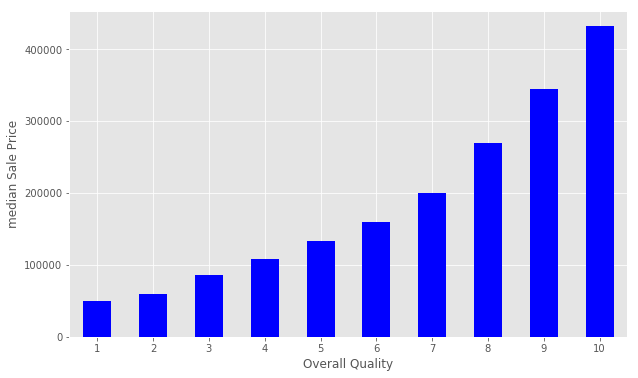

In [14]:
quality_pivot.plot(kind = "bar", color="blue")
plt.xlabel("Overall Quality")
plt.ylabel("median Sale Price")
plt.xticks(rotation=0)
plt.show()

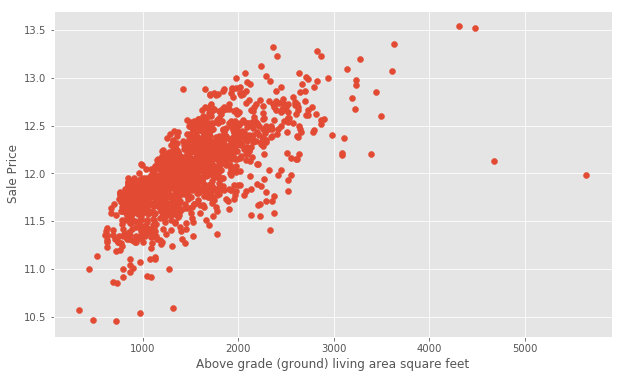

In [15]:
plt.scatter(x=train.GrLivArea, y = target)
plt.ylabel("Sale Price")
plt.xlabel("Above grade (ground) living area square feet")
plt.show()

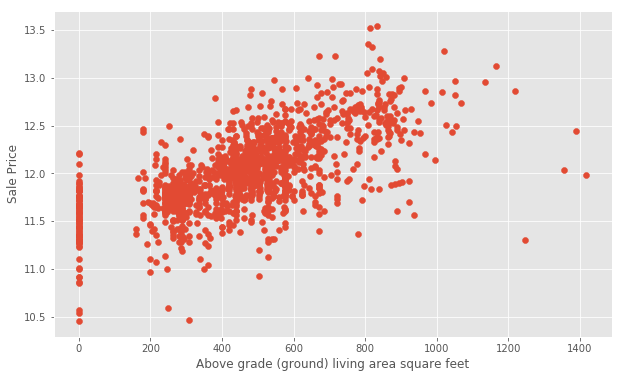

In [16]:
plt.scatter(x=train.GarageArea, y = target)
plt.ylabel("Sale Price")
plt.xlabel("Above grade (ground) living area square feet")
plt.show()

In [17]:
## removing outliers
train = train[train.GarageArea < 1200]

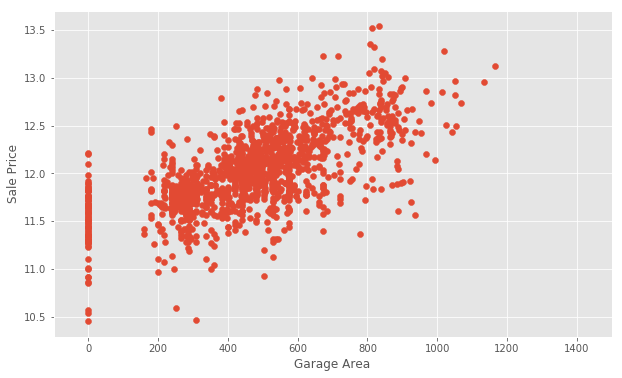

In [18]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-100,1500)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [19]:
## NA values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.colums = ['null Count']
nulls.index.name = 'Feature'
nulls

,0
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [20]:
print ( train.MiscFeature.unique())

[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [21]:
##non numeric factors
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [22]:
## engineering features

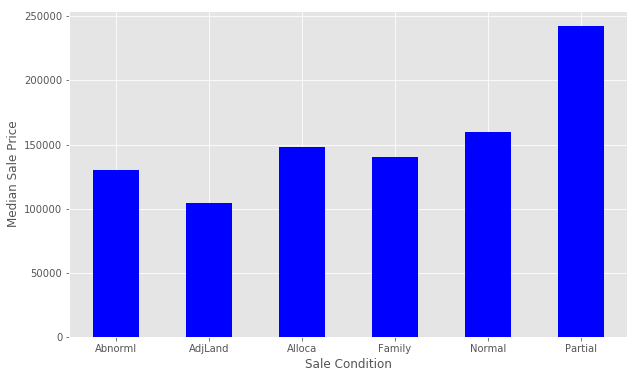

In [23]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [24]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

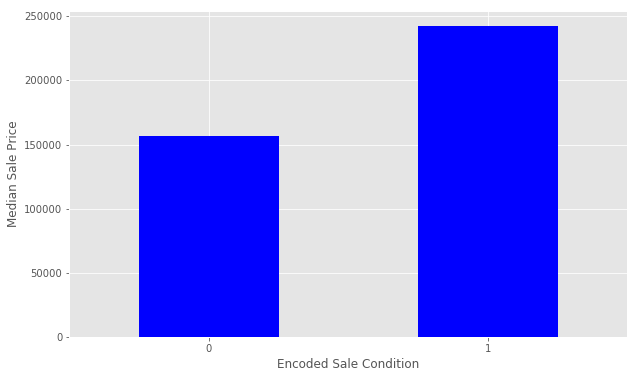

In [25]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [26]:
print (train.Street.value_counts(), "\n")

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [27]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [28]:
print (train.enc_street.value_counts(), "\n")

1    1450
0       5
Name: enc_street, dtype: int64 



In [29]:
print (train.CentralAir.value_counts(), "\n")

Y    1360
N      95
Name: CentralAir, dtype: int64 



In [30]:
train['enc_CentralAir'] = pd.get_dummies(train.CentralAir, drop_first=True)
test['enc_CentralAir'] = pd.get_dummies(train.CentralAir, drop_first=True)

In [31]:
print (train.enc_CentralAir.value_counts(), "\n")

1    1360
0      95
Name: enc_CentralAir, dtype: int64 



In [32]:
print (train.Utilities.value_counts(), "\n")

AllPub    1454
NoSeWa       1
Name: Utilities, dtype: int64 



In [33]:
train['enc_Utilities'] = pd.get_dummies(train.Utilities, drop_first=True)
test['enc_Utilities'] = pd.get_dummies(train.Utilities, drop_first=True)

In [34]:
print (train.enc_Utilities.value_counts(), "\n")

0    1454
1       1
Name: enc_Utilities, dtype: int64 



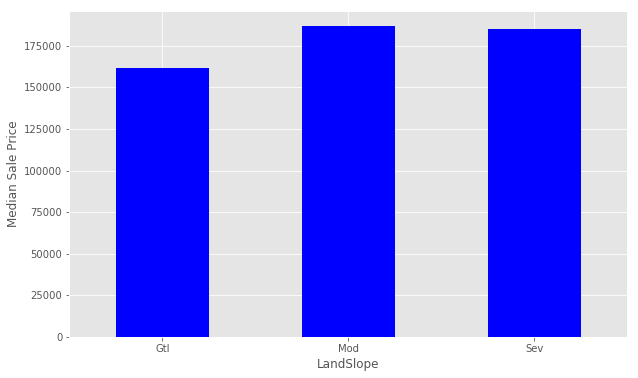

In [35]:
condition_pivot = train.pivot_table(index='LandSlope',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('LandSlope')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [36]:
def encode(x): return 1 if x == 'Mod'or x == 'Sev' else 0
train['enc_LandSlope'] = train.LandSlope.apply(encode)
test['enc_LandSlope'] = test.LandSlope.apply(encode)

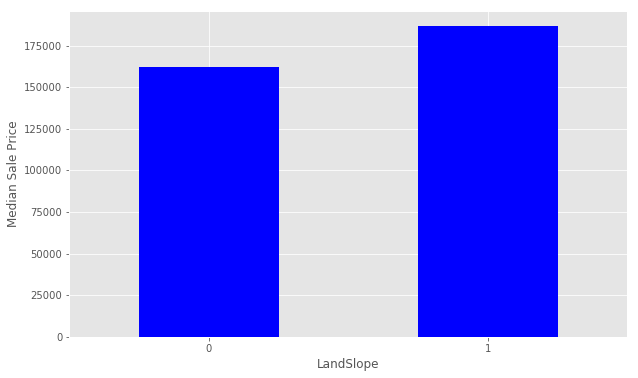

In [37]:
LandSlope_pivot = train.pivot_table(index='enc_LandSlope', values='SalePrice', aggfunc=np.median)
LandSlope_pivot.plot(kind='bar', color='blue')
plt.xlabel('LandSlope')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

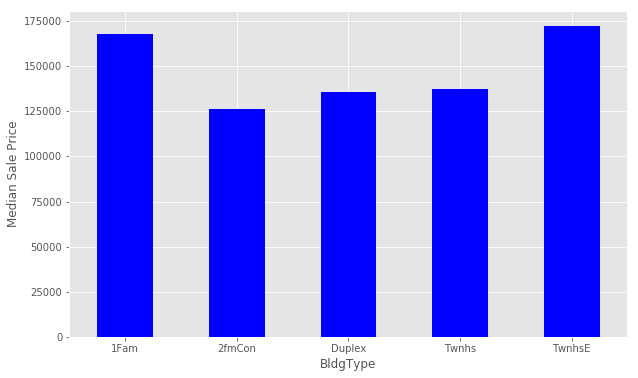

In [38]:
BldgType_pivot = train.pivot_table(index='BldgType',
                                    values='SalePrice', aggfunc=np.median)
BldgType_pivot.plot(kind='bar', color='blue')
plt.xlabel('BldgType')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [39]:
def encode(x): return 1 if x == '1Fam'or x == 'TwnhsE' else 0
train['enc_BldgType'] = train.BldgType.apply(encode)
test['enc_BldgType'] = test.BldgType.apply(encode)

In [40]:
## fix NAs for PoolQC
poolnull = train.PoolQC.isnull().sum()
poolnull

1449

In [41]:
train.PoolQC.fillna(value=0, inplace = True) # 0 shows no pool
test.PoolQC.fillna(value=0, inplace = True)

In [42]:
print(train.PoolQC.value_counts())

0     1449
Fa       2
Gd       2
Ex       2
Name: PoolQC, dtype: int64


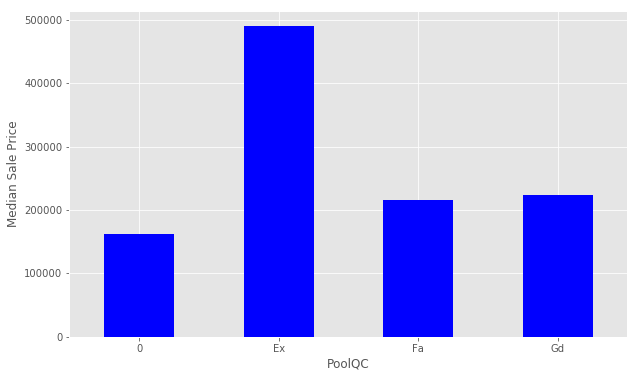

In [43]:
PoolQC_pivot = train.pivot_table(index='PoolQC',
                                    values='SalePrice', aggfunc=np.median)
PoolQC_pivot.plot(kind='bar', color='blue')
plt.xlabel('PoolQC')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [44]:
poolnull2 = train.PoolQC.isnull().sum()
poolnull2

0

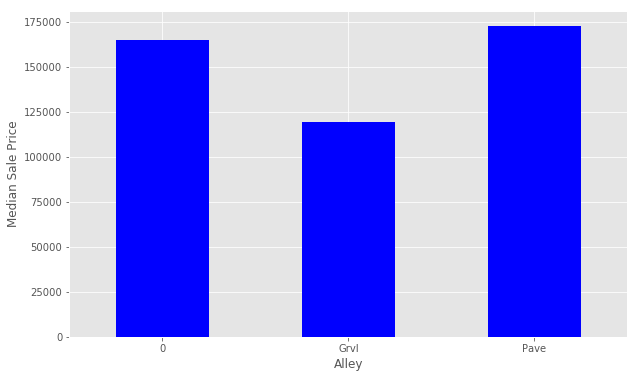

In [45]:
##NAN in Alley
train.Alley.fillna(value=0, inplace = True) # 0 shoes no alley
test.Alley.fillna(value=0, inplace = True)
Alley_pivot = train.pivot_table(index='Alley',
                                    values='SalePrice', aggfunc=np.median)
Alley_pivot.plot(kind='bar', color='blue')
plt.xlabel('Alley')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

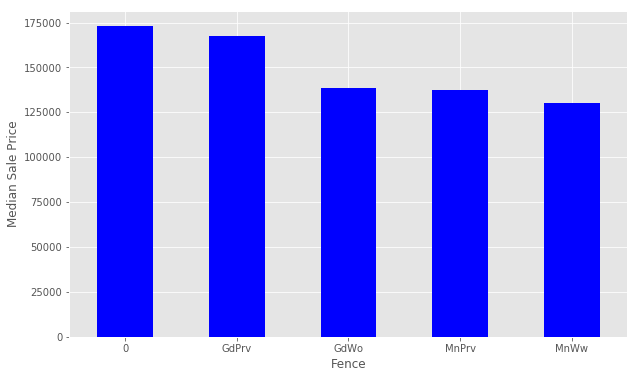

In [46]:
##NAN in Fence
train.Fence.fillna(value=0, inplace = True) # 0 shoes no Fence
test.Fence.fillna(value=0, inplace = True)
Fence_pivot = train.pivot_table(index='Fence',
                                    values='SalePrice', aggfunc=np.median)
Fence_pivot.plot(kind='bar', color='blue')
plt.xlabel('Fence')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

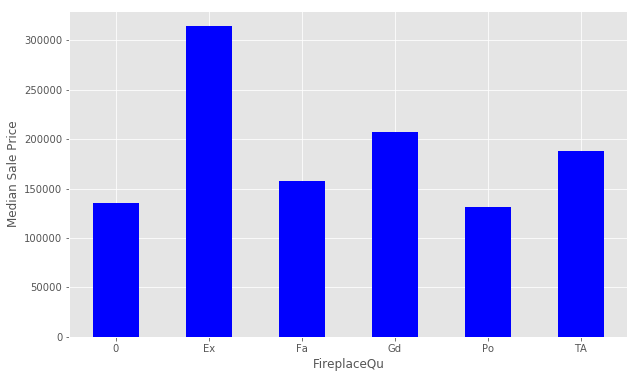

In [47]:
##NAN in FireplaceQu
train.FireplaceQu.fillna(value=0, inplace = True) # 0 shoes no Fence
test.FireplaceQu.fillna(value=0, inplace = True)
FireplaceQu_pivot = train.pivot_table(index='FireplaceQu',
                                    values='SalePrice', aggfunc=np.median)
FireplaceQu_pivot.plot(kind='bar', color='blue')
plt.xlabel('FireplaceQu')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [48]:
#for test dataset
categorical_var = ['Alley', 'FireplaceQu', 'Fence' ,'enc_street', 'enc_CentralAir', 'enc_Utilities', 'PoolQC']

for variable in categorical_var:
    dummies = pd.get_dummies(test[variable], prefix =variable)
    test = pd.concat([test, dummies], axis =1)
    test.drop([variable], axis = 1, inplace=True)

In [49]:
#for train dataset
categorical_var = ['Alley', 'FireplaceQu', 'Fence' ,'enc_street', 'enc_CentralAir', 'enc_Utilities', 'PoolQC']

for variable in categorical_var:
    dummies = pd.get_dummies(train[variable], prefix =variable)
    train = pd.concat([train, dummies], axis =1)
    train.drop([variable], axis = 1, inplace=True)

In [50]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,enc_street_0,enc_street_1,enc_CentralAir_0,enc_CentralAir_1,enc_Utilities_0,enc_Utilities_1,PoolQC_0,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,1,1,0,1,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,1,0,1,1,0,1,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,1,0,1,1,0,1,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,1,0,1,1,0,1,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,1,0,1,1,0,1,0,0,0


In [51]:
## NA values

In [52]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna() 

In [53]:
sum(data.isnull().sum() != 0)

0

In [54]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=42, test_size=.33)

In [56]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [57]:
model = lr.fit(X_train, y_train)

In [58]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.883655847045


In [59]:
predictions = model.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.018574917814


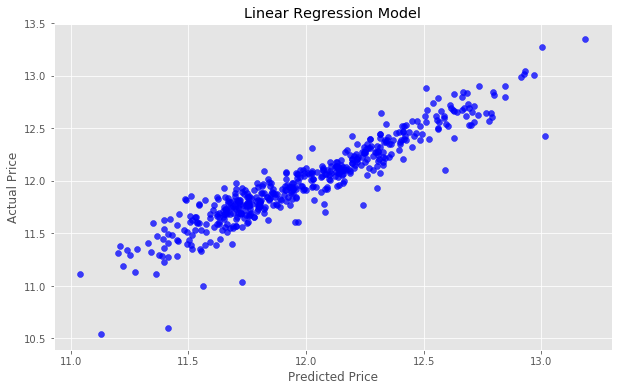

In [61]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [62]:
##improving model

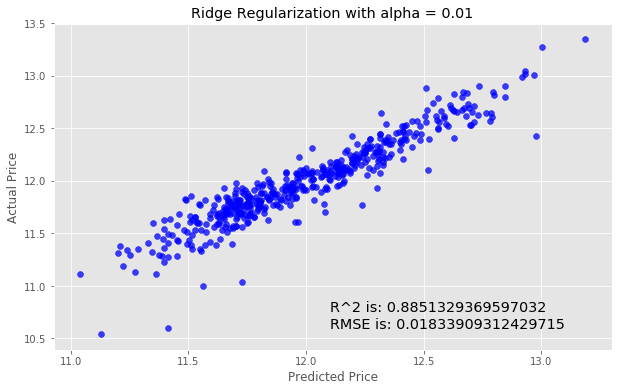

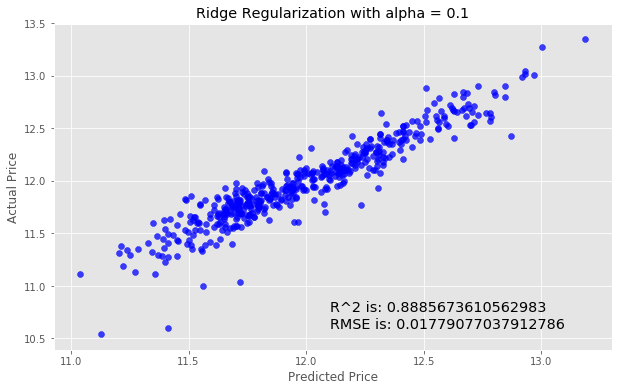

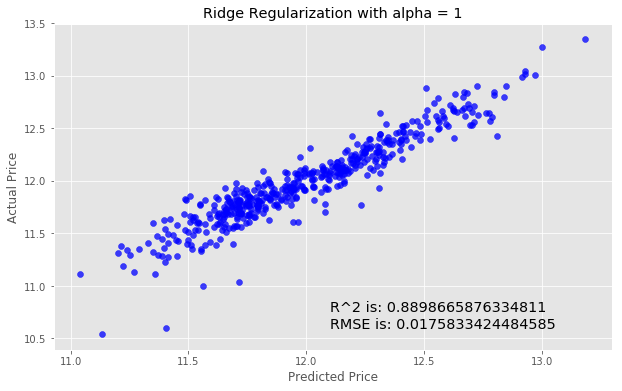

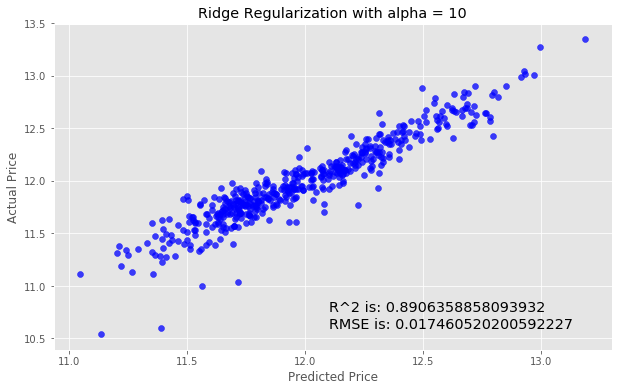

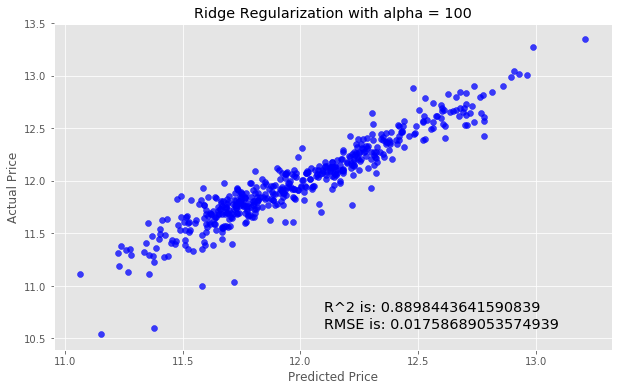

In [63]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [64]:
#model with alpha = 10
rm = linear_model.Ridge(alpha=10)
model = rm.fit(X_train, y_train)

In [65]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.890635885809


In [66]:
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.0174605202006


In [67]:
#making submission

In [68]:
test[-3:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Fence_MnWw,enc_street_0.0,enc_street_1.0,enc_CentralAir_0.0,enc_CentralAir_1.0,enc_Utilities_0.0,enc_Utilities_1.0,PoolQC_0,PoolQC_Ex,PoolQC_Gd
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,1,1,0,1,0,0
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,1,1,0,1,0,0
1458,2919,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,1,1,0,1,0,0


In [69]:
train[-3:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,enc_street_0,enc_street_1,enc_CentralAir_0,enc_CentralAir_1,enc_Utilities_0,enc_Utilities_1,PoolQC_0,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,1,1,0,1,0,0,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,1,1,0,1,0,0,0
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,1,1,0,1,0,0,0


In [70]:
test['Pool_Fa'] =0

In [71]:
test[-3:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,enc_street_0.0,enc_street_1.0,enc_CentralAir_0.0,enc_CentralAir_1.0,enc_Utilities_0.0,enc_Utilities_1.0,PoolQC_0,PoolQC_Ex,PoolQC_Gd,Pool_Fa
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,1,1,0,1,0,0,0
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,1,1,0,1,0,0,0
1458,2919,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,1,1,0,1,0,0,0


In [72]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [73]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [74]:
predictions = model.predict(feats)

In [75]:
final_predictions = np.exp(predictions)

In [76]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [ 11.76144782  11.75213916  12.05778344  12.22451257  12.11268595] 

Final predictions are: 
 [ 128212.94834674  127024.99547593  172436.34594351  203722.19793151
  182168.24190407]


In [77]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128212.948347
1,1462,127024.995476
2,1463,172436.345944
3,1464,203722.197932
4,1465,182168.241904


In [78]:
submission.to_csv('submission2.csv', index=False)

In [79]:
submission[-2:]

,Id,SalePrice
1457,2918,112208.816310
1458,2919,239066.519063
